# Modelo MLP Classifier

## Equipo 4:


*   Karla Andrea Palma Villanueva (A01754270)
*   Viviana Alanis Fraige (A01236316)
* David Fernando Armendariz Torres (A01570813)
* Alan Alberto Mota Yescas (A01753924)
* Adrián Chávez Morales (A01568679)
* Jose Manuel Armendáriz Mena (A01197583)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, validation_curve, StratifiedKFold # Model tunning
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [91]:
#The seed is used to ensure that the model results can be replicated
import random # Randomness
sd = 11
np.random.seed(sd)

#Load datasets  

In [92]:
X= pd.read_csv('X_train_C.csv')
X.head()

,PassengerId,Pclass,Sex,Age,C,Q,MT,NT,PT,Family_Size
0,1,1,1,-0.559038,0,0,0,0,0,0.059160
1,2,3,0,0.648087,1,0,0,0,0,0.059160
2,3,1,0,-0.257257,0,0,0,0,0,-0.560975
3,4,3,0,0.421751,0,0,0,0,0,0.059160
4,5,1,1,0.421751,0,0,0,0,0,-0.560975


In [93]:
y= pd.read_csv('y_train_C.csv')
y.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


## Split data into training and testing sets

In [94]:
#Training set: 80%
#Testing set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y["Survived"], test_size=0.2)

In [95]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train the model

In [96]:
#The MLP is trained with two hidden layers of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

#Predictions

In [97]:
y_pred = mlp.predict(X_test)

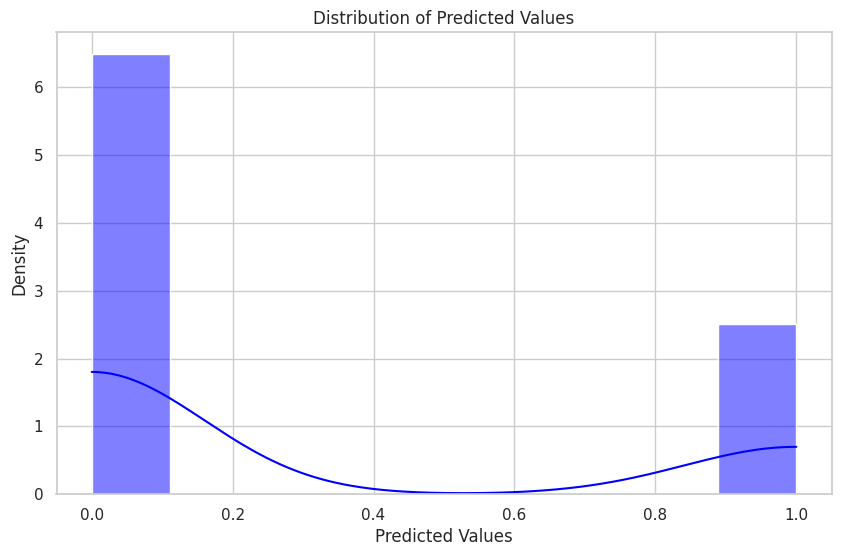

In [98]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='blue', kde=True, stat="density")
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.title('Distribution of Predicted Values')
plt.show()


# Evaluate the model

In [99]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110   8]
 [ 19  42]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       118
           1       0.84      0.69      0.76        61

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.85      0.85      0.85       179



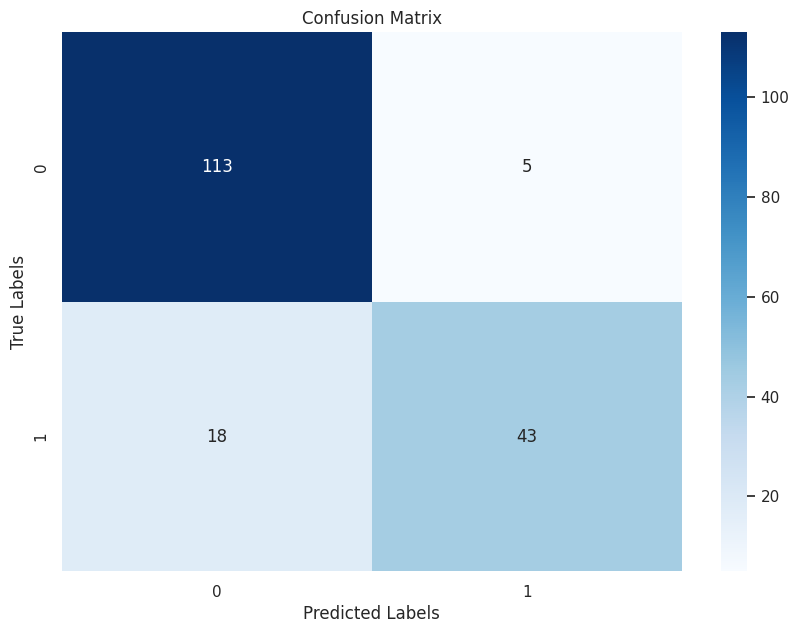

In [104]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Correct model

In [100]:
# Define cross-validation grid for MLP
cv_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# Define the cross-validation strategy | 5-Folds
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the MLP model
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [101]:
y_pred = mlp.predict(X_test)

In [102]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[113   5]
 [ 18  43]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       118
           1       0.90      0.70      0.79        61

    accuracy                           0.87       179
   macro avg       0.88      0.83      0.85       179
weighted avg       0.87      0.87      0.87       179



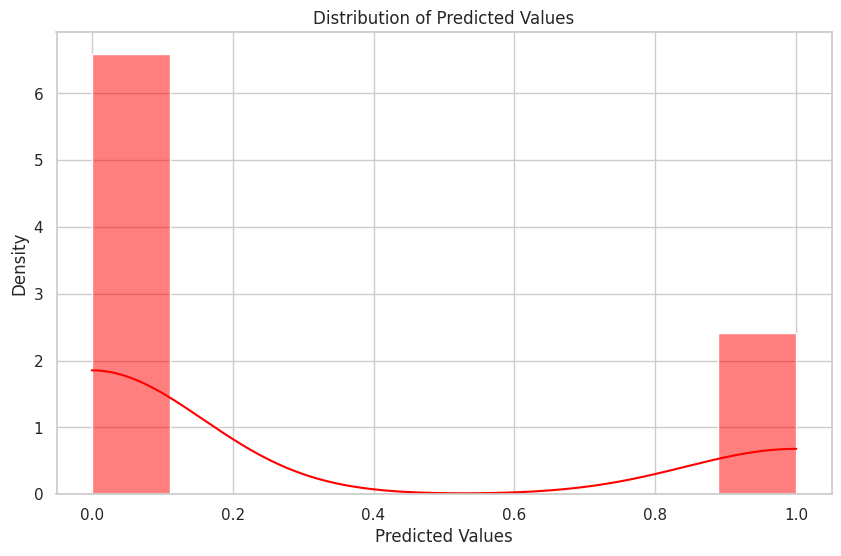

In [69]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, color='red', kde=True, stat="density")
plt.xlabel('Predicted Values')
plt.ylabel('Density')
plt.title('Distribution of Predicted Values')
plt.show()